In [39]:
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import AutoMinorLocator, NullFormatter, MultipleLocator
import scipy as sp
from scipy.optimize import fsolve
import math

In [2]:
#myFile = np.genfromtxt('temp.csv', delimiter=',')
myFile = np.genfromtxt('CO2_S1_corrected_30min_2.csv', delimiter=',')

In [6]:
h = 105216
c1 = [0] * h
data = [0] * h
time = [0] * h

In [7]:
for i in range(h):
    c1[i] = myFile[i+1][6]
    time[i] = i + 1
    data[i] = (i+1)/(48*365) + 2011.5

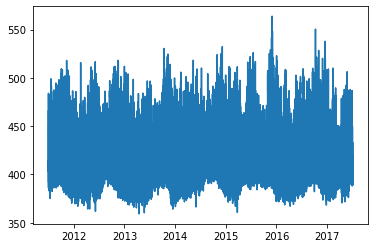

In [8]:
plt.plot(data,c1)
plt.show()

# усреднение за дневной период

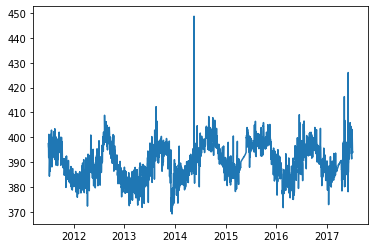

In [81]:
H = 2192
dateonday = [0] * H
day = [0] * H
for i in range(H):
    for k in range(48):
        if (myFile[48*i+k][5] == 13):
            for g in range(8):
                dateonday[i] += myFile[48*i+k][6]
    dateonday[i] /= 8
    day[i] = (i+1)/(365) + 2011.5
plt.plot(day,dateonday)

In [82]:
raw_data = {'t':day,'data':dateonday}

df = pd.DataFrame(raw_data, columns=['t', 'data'])
df.to_csv('усредненные за дневной период данные.csv')

PermissionError: [Errno 13] Permission denied: 'усредненные за дневной период данные.csv'

c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  """Entry point for launching an IPython kernel.
c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  


Параметры модели: [ 7.25040136e-01 -1.07037783e+03]
 
0.725 x - 1070


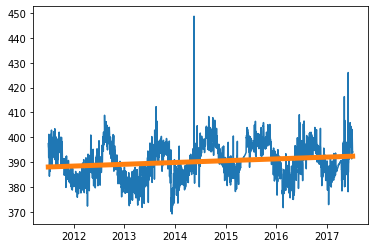

In [83]:
fx = sp.linspace(day[0], day[-1], 1000)
fp, residuals, rank, sv, rcond = sp.polyfit(day, dateonday, 1, full=True)
print("Параметры модели: %s" % fp)
#функция-полином, если её напечатать, то увидите математическое выражение
f = sp.poly1d(fp)
print(f)
#рисуем график модельной функции

plt.plot(day,dateonday)
plt.plot(fx, f(fx), linewidth=5)
plt.show()

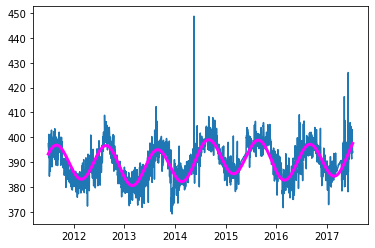

In [84]:
w1 = [0.00273722628, 4.22604471, 5.92676324] #частота, косинус, синус
w2 = [0.000912408759, 0.901582934, 1.73690724]


func= [0] * H
for i in range(H):
    func[i] = w1[1] * math.cos(2* math.pi *w1[0] * (i+1)) + w1[2] * math.sin(2* math.pi *w1[0] * (i+1))
    func[i] += w2[1] * math.cos(2* math.pi *w2[0] * (i+1)) + w2[2] * math.sin(2* math.pi *w2[0] * (i+1))
    func[i] += fp[0] * (i+1)/365 + fp[1] + 2011.5*fp[0]

plt.plot(day,dateonday)
plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

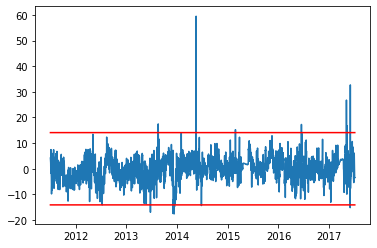

In [85]:
hist1 = [0] * H
for i in range(H):
    hist1[i] = dateonday[i] - func[i]

st_err = np.std(hist1)

f1 = [0] * H
f2 = [0] * H

for i in range(H):
    f1[i] = 3 * st_err
    f2[i] = -3 * st_err

plt.plot(day,hist1)
plt.plot(day,f1, color = 'red')
plt.plot(day,f2, color = 'red')
#plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

15


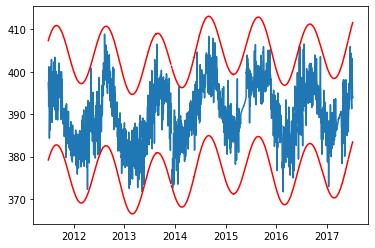

In [86]:
fverh = [0] * H
fniz = [0] * H
geiger = 0
for i in range(H):
    fverh[i] = func[i] + 3 * st_err
    fniz[i] = func[i] - 3 * st_err
    if ((dateonday[i] > fverh[i]) or (dateonday[i] < fniz[i])):
        geiger += 1
        dateonday[i] = np.nan
        day[i] = np.nan

print(geiger)

plt.plot(day, dateonday)
plt.plot(day,fverh, color = 'red')
plt.plot(day,fniz, color = 'red')

In [90]:
dateonday1 = []
day1 = []

for i in range(H):
    if dateonday[i] > 0 :
        dateonday1.append(dateonday[i])
        day1.append(day[i])
        

c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  """Entry point for launching an IPython kernel.
c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  


Параметры модели: [ 6.86862855e-01 -9.93491247e+02]
 
0.6869 x - 993.5


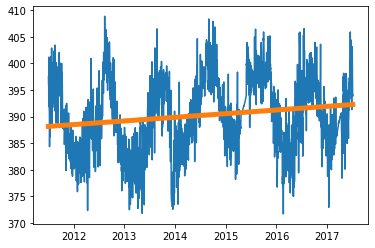

In [91]:
fx = sp.linspace(day1[0], day1[-1], 1000)
fp, residuals, rank, sv, rcond = sp.polyfit(day1, dateonday1, 1, full=True)
print("Параметры модели: %s" % fp)
#функция-полином, если её напечатать, то увидите математическое выражение
f = sp.poly1d(fp)
print(f)
#рисуем график модельной функции

plt.plot(day1,dateonday1)
plt.plot(fx, f(fx), linewidth=5)
plt.show()

In [92]:
raw_data = {'t':day,'data':dateonday}

df = pd.DataFrame(raw_data, columns=['t', 'data'])
df.to_csv('усредненные за дневной период данные1.csv')

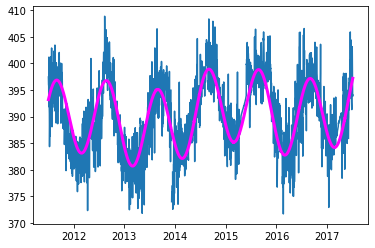

In [93]:
w1 = [0.00273722628, 4.13392941, 6.01734318] #частота, косинус, синус
w2 = [0.000912408759, 0.798163411, 1.69611578]


func= [0] * H
for i in range(H):
    func[i] = w1[1] * math.cos(2* math.pi *w1[0] * (i+1)) + w1[2] * math.sin(2* math.pi *w1[0] * (i+1))
    func[i] += w2[1] * math.cos(2* math.pi *w2[0] * (i+1)) + w2[2] * math.sin(2* math.pi *w2[0] * (i+1))
    func[i] += fp[0] * (i+1)/365 + fp[1] + 2011.5*fp[0]

plt.plot(day,dateonday)
plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

4.300265579509649


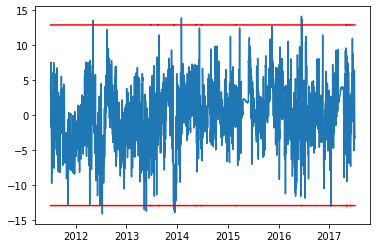

In [98]:
hist1 = []
dayh = []
for i in range(H):
    if dateonday[i] > 0:
        hist1.append(dateonday[i] - func[i])
        dayh.append(day[i])

st_err = np.std(hist1)
print(st_err)

f1 = [0] * H
f2 = [0] * H

for i in range(H):
    f1[i] = 3 * st_err
    f2[i] = -3 * st_err

plt.plot(dayh,hist1)
plt.plot(day,f1, color = 'red')
plt.plot(day,f2, color = 'red')
#plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

12


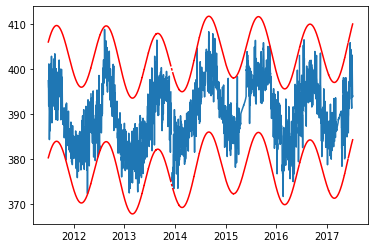

In [99]:
fverh = [0] * H
fniz = [0] * H
geiger = 0
for i in range(H):
    fverh[i] = func[i] + 3 * st_err
    fniz[i] = func[i] - 3 * st_err
    if ((dateonday[i] > fverh[i]) or (dateonday[i] < fniz[i])):
        geiger += 1
        dateonday[i] = np.nan
        day[i] = np.nan

print(geiger)

plt.plot(day, dateonday)
plt.plot(day,fverh, color = 'red')
plt.plot(day,fniz, color = 'red')

In [100]:
dateonday1 = []
day1 = []

for i in range(H):
    if dateonday[i] > 0 :
        dateonday1.append(dateonday[i])
        day1.append(day[i])

c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  """Entry point for launching an IPython kernel.
c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  


Параметры модели: [ 6.75413205e-01 -9.70393289e+02]
 
0.6754 x - 970.4


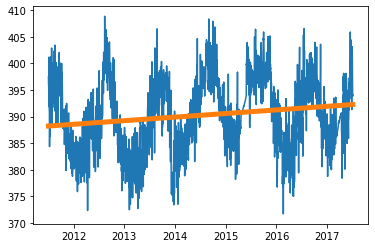

In [101]:
fx = sp.linspace(day1[0], day1[-1], 1000)
fp, residuals, rank, sv, rcond = sp.polyfit(day1, dateonday1, 1, full=True)
print("Параметры модели: %s" % fp)
#функция-полином, если её напечатать, то увидите математическое выражение
f = sp.poly1d(fp)
print(f)
#рисуем график модельной функции

plt.plot(day1,dateonday1)
plt.plot(fx, f(fx), linewidth=5)
plt.show()

In [102]:
raw_data = {'t':day,'data':dateonday}

df = pd.DataFrame(raw_data, columns=['t', 'data'])
df.to_csv('усредненные за дневной период данные2.csv')

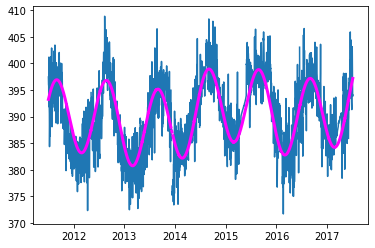

In [103]:
w1 = [0.00273722628, 4.10973897, 6.0272196] #частота, косинус, синус
w2 = [0.000912408759, 0.802594371, 1.68087964]


func= [0] * H
for i in range(H):
    func[i] = w1[1] * math.cos(2* math.pi *w1[0] * (i+1)) + w1[2] * math.sin(2* math.pi *w1[0] * (i+1))
    func[i] += w2[1] * math.cos(2* math.pi *w2[0] * (i+1)) + w2[2] * math.sin(2* math.pi *w2[0] * (i+1))
    func[i] += fp[0] * (i+1)/365 + fp[1] + 2011.5*fp[0]

plt.plot(day,dateonday)
plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

4.195873895985982


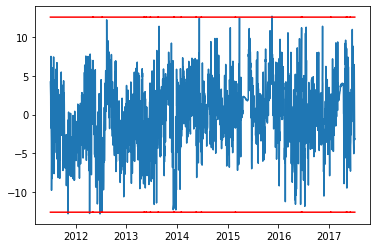

In [104]:
hist1 = []
dayh = []
for i in range(H):
    if dateonday[i] > 0:
        hist1.append(dateonday[i] - func[i])
        dayh.append(day[i])

st_err = np.std(hist1)
print(st_err)

f1 = [0] * H
f2 = [0] * H

for i in range(H):
    f1[i] = 3 * st_err
    f2[i] = -3 * st_err

plt.plot(dayh,hist1)
plt.plot(day,f1, color = 'red')
plt.plot(day,f2, color = 'red')
#plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

4


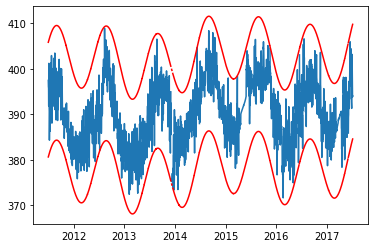

In [105]:
fverh = [0] * H
fniz = [0] * H
geiger = 0
for i in range(H):
    fverh[i] = func[i] + 3 * st_err
    fniz[i] = func[i] - 3 * st_err
    if ((dateonday[i] > fverh[i]) or (dateonday[i] < fniz[i])):
        geiger += 1
        dateonday[i] = np.nan
        day[i] = np.nan

print(geiger)

plt.plot(day, dateonday)
plt.plot(day,fverh, color = 'red')
plt.plot(day,fniz, color = 'red')

In [106]:
dateonday1 = []
day1 = []

for i in range(H):
    if dateonday[i] > 0 :
        dateonday1.append(dateonday[i])
        day1.append(day[i])

c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  """Entry point for launching an IPython kernel.
c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  


Параметры модели: [ 6.60694008e-01 -9.40732422e+02]
 
0.6607 x - 940.7


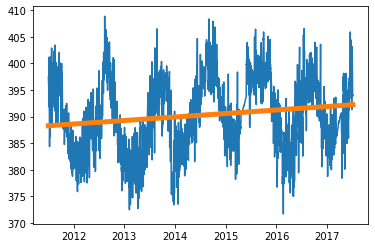

In [107]:
fx = sp.linspace(day1[0], day1[-1], 1000)
fp, residuals, rank, sv, rcond = sp.polyfit(day1, dateonday1, 1, full=True)
print("Параметры модели: %s" % fp)
#функция-полином, если её напечатать, то увидите математическое выражение
f = sp.poly1d(fp)
print(f)
#рисуем график модельной функции

plt.plot(day1,dateonday1)
plt.plot(fx, f(fx), linewidth=5)
plt.show()

In [108]:
raw_data = {'t':day,'data':dateonday}

df = pd.DataFrame(raw_data, columns=['t', 'data'])
df.to_csv('усредненные за дневной период данные3.csv')

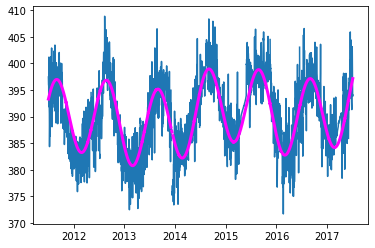

In [109]:
w1 = [0.00273722628, 4.11366918, 6.02101133] #частота, косинус, синус
w2 = [0.000912408759, 0.809177168, 1.69175309]


func= [0] * H
for i in range(H):
    func[i] = w1[1] * math.cos(2* math.pi *w1[0] * (i+1)) + w1[2] * math.sin(2* math.pi *w1[0] * (i+1))
    func[i] += w2[1] * math.cos(2* math.pi *w2[0] * (i+1)) + w2[2] * math.sin(2* math.pi *w2[0] * (i+1))
    func[i] += fp[0] * (i+1)/365 + fp[1] + 2011.5*fp[0]

plt.plot(day,dateonday)
plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

4.1697080670783935


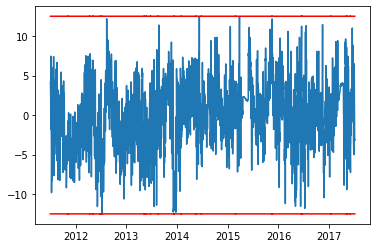

In [110]:
hist1 = []
dayh = []
for i in range(H):
    if dateonday[i] > 0:
        hist1.append(dateonday[i] - func[i])
        dayh.append(day[i])

st_err = np.std(hist1)
print(st_err)

f1 = [0] * H
f2 = [0] * H

for i in range(H):
    f1[i] = 3 * st_err
    f2[i] = -3 * st_err

plt.plot(dayh,hist1)
plt.plot(day,f1, color = 'red')
plt.plot(day,f2, color = 'red')
#plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

1


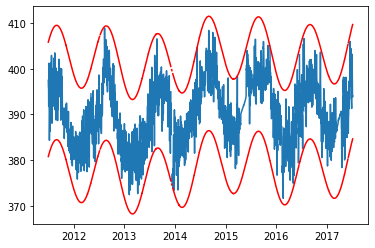

In [111]:
fverh = [0] * H
fniz = [0] * H
geiger = 0
for i in range(H):
    fverh[i] = func[i] + 3 * st_err
    fniz[i] = func[i] - 3 * st_err
    if ((dateonday[i] > fverh[i]) or (dateonday[i] < fniz[i])):
        geiger += 1
        dateonday[i] = np.nan
        day[i] = np.nan

print(geiger)

plt.plot(day, dateonday)
plt.plot(day,fverh, color = 'red')
plt.plot(day,fniz, color = 'red')

In [112]:
dateonday1 = []
day1 = []

for i in range(H):
    if dateonday[i] > 0 :
        dateonday1.append(dateonday[i])
        day1.append(day[i])

c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  """Entry point for launching an IPython kernel.
c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  


Параметры модели: [ 6.58604177e-01 -9.36519287e+02]
 
0.6586 x - 936.5


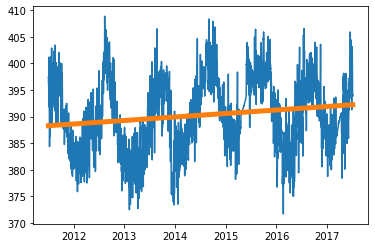

In [113]:
fx = sp.linspace(day1[0], day1[-1], 1000)
fp, residuals, rank, sv, rcond = sp.polyfit(day1, dateonday1, 1, full=True)
print("Параметры модели: %s" % fp)
#функция-полином, если её напечатать, то увидите математическое выражение
f = sp.poly1d(fp)
print(f)
#рисуем график модельной функции

plt.plot(day1,dateonday1)
plt.plot(fx, f(fx), linewidth=5)
plt.show()

In [117]:
raw_data = {'t':day,'data':dateonday}

df = pd.DataFrame(raw_data, columns=['t', 'data'])
df.to_csv('усредненные за дневной период данные4.csv')

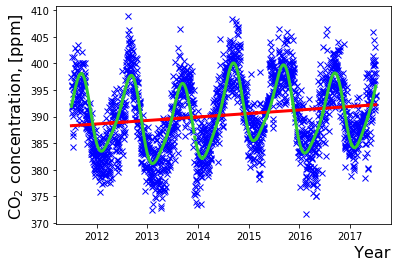

In [139]:
w1 = [0.00273722628, 4.11740705, 6.0209819] #частота, косинус, синус
w2 = [0.000912408759, 0.807189469, 1.69376015]
w3 = [0.00547445255, -1.39485597, 0.268817633]

linia = [0] * H
func= [0] * H
for i in range(H):
    func[i] = w1[1] * math.cos(2* math.pi *w1[0] * (i+1)) + w1[2] * math.sin(2* math.pi *w1[0] * (i+1))
    func[i] += w2[1] * math.cos(2* math.pi *w2[0] * (i+1)) + w2[2] * math.sin(2* math.pi *w2[0] * (i+1))
    func[i] += w3[1] * math.cos(2* math.pi *w3[0] * (i+1)) + w3[2] * math.sin(2* math.pi *w3[0] * (i+1))
    func[i] += fp[0] * (i+1)/365 + fp[1] + 2011.5*fp[0]
    linia[i] = fp[0] * (i+1)/365 + fp[1] + 2011.5*fp[0]

plt.plot(day,dateonday, 'x',  color = 'blue')
plt.plot(day,linia, color ='red', linewidth=3)
plt.plot(day,func, color = 'limegreen', linewidth=3)
plt.ylabel('СО$_{2}$ concentration, [ppm] ', size=16)
plt.xlabel('                                                          Year',size=16)

plt.savefig('график.png', dpi=600) 
plt.show()

4.1628686212856145


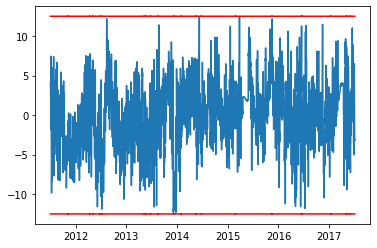

In [119]:
hist1 = []
dayh = []
for i in range(H):
    if dateonday[i] > 0:
        hist1.append(dateonday[i] - func[i])
        dayh.append(day[i])

st_err = np.std(hist1)
print(st_err)

f1 = [0] * H
f2 = [0] * H

for i in range(H):
    f1[i] = 3 * st_err
    f2[i] = -3 * st_err

plt.plot(dayh,hist1)
plt.plot(day,f1, color = 'red')
plt.plot(day,f2, color = 'red')
#plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

0


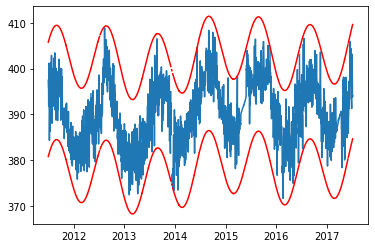

In [120]:
fverh = [0] * H
fniz = [0] * H
geiger = 0
for i in range(H):
    fverh[i] = func[i] + 3 * st_err
    fniz[i] = func[i] - 3 * st_err
    if ((dateonday[i] > fverh[i]) or (dateonday[i] < fniz[i])):
        geiger += 1
        dateonday[i] = np.nan
        day[i] = np.nan

print(geiger)

plt.plot(day, dateonday)
plt.plot(day,fverh, color = 'red')
plt.plot(day,fniz, color = 'red')